In [5]:
%matplotlib widget

import pybamm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

from temperature_dependent_OCP import TemperatureDependentOpenCircuitPotential

param = pybamm.ParameterValues("ORegan2022")

# print(param.keys)

options = {"thermal": "lumped"}

mdl_DFN_NMC = pybamm.lithium_ion.DFN(options=options, build=False)

for dom in ["negative", "positive"]:
    key = f"{dom} open-circuit potential"
    mdl_DFN_NMC.submodels[key] = TemperatureDependentOpenCircuitPotential(
        mdl_DFN_NMC.param,                   # <‑‑ always pass the same ParameterValues
        domain=dom,
        reaction="lithium-ion main",
        options=mdl_DFN_NMC.options,
    )

mdl_DFN_NMC.build_model() 


print(list(mdl_DFN_NMC.submodels)) 





exp_GITT = pybamm.Experiment([
(
    "Discharge at C/10 for 6 minutes or until 2.5 V",
    "Rest for 2.5 hours",
)
]*100)
#our GITT experiment
#SOC resolution = 0.1C * 6min/60min = 0.01 = 1%

# mdl_DFN_NMC.variables


['external circuit', 'discharge and throughput variables', 'porosity', 'Negative interface utilisation', 'Positive interface utilisation', 'negative primaryparticle mechanics', 'positive primaryparticle mechanics', 'negative primary active material', 'positive primary active material', 'electrolyte transport efficiency', 'electrode transport efficiency', 'transverse convection', 'through-cell convection', 'negative primary open-circuit potential', 'positive primary open-circuit potential', 'negative primary interface', 'positive primary interface', 'negative primary particle', 'negative primary total particle concentration', 'positive primary particle', 'positive primary total particle concentration', 'negative electrode potential', 'positive electrode potential', 'electrolyte diffusion', 'electrolyte conductivity', 'negative surface potential difference', 'separator surface potential difference', 'positive surface potential difference', 'thermal', 'surface temperature', 'current colle

2025-06-05 11:15:01.924 - [WARNING] base_model.default_solver(417): The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
2025-06-05 11:15:13.643 - [WARNING] base_model.default_solver(417): The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
2025-06-05 11:15:25.462 - [WARNING] base_model.default_solver(417): The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
2025-06-05 11:15:36.448 - [WARNING] base_model.default_solver(417): The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
2025-06-05 11:15:47.685 - [WARNING] base_model.default_solver(417): The default solver changed to IDAKLUSolv

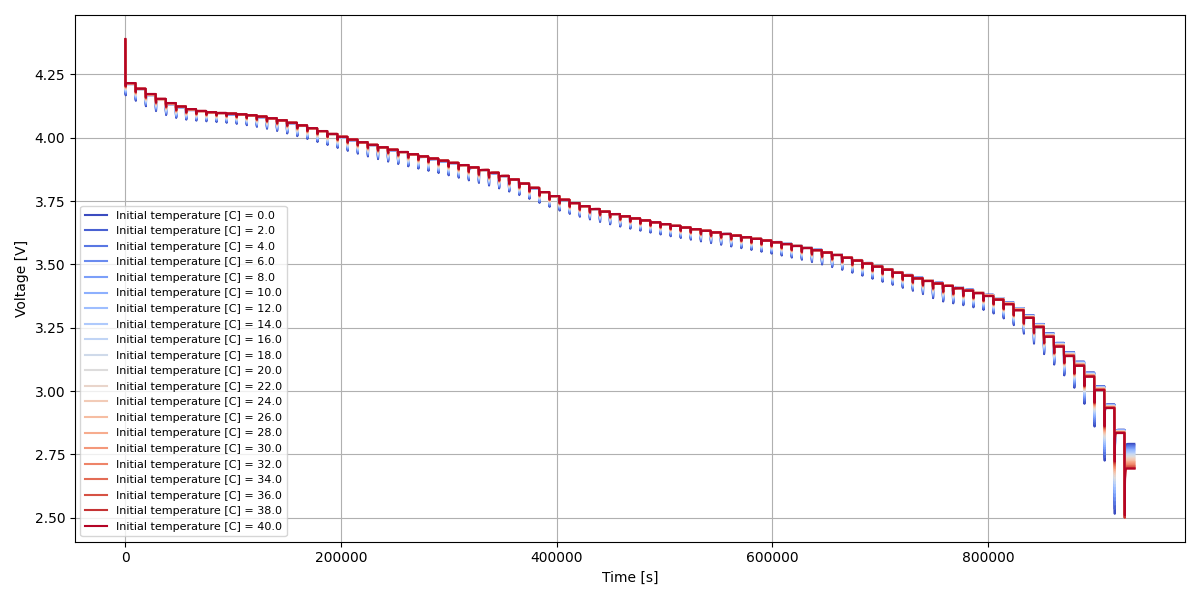

In [6]:
# initialize variables

GITT_solsT = []
# this is the vector to store all GITT simulation solutions, with each value being a different temperature
GITT_V =[]
#This is the vector that stores the GITT voltage values
GITT_t = [] 
# this vector stores all of the GITT time values that correspond to the voltage values
GITT_SOC = []
# this vector stores all of the SOC values that correspond to the voltage values
labels = []
#this is for labeling the plot at the end

# temps = np.arange(298-30, 298+31, 3   )

temps = np.linspace(273.15, 313.15, 21)
#define temperatures to run the simulation at
tempsinC = np.linspace(0, 40, 21)
#same temperatures as above but in C

norm = mcolors.Normalize(vmin=temps.min(), vmax=temps.max())
cmap = cm.get_cmap("coolwarm") 


for t, tinC in zip(temps, tempsinC):
    #we are looping this simulation for every temperature we defined
    #temps is what pybamm takes and tempsinC is purely for the plots label
    param_temp = param.copy()
    param_temp.update({"Initial temperature [K]": t})
    param_temp.update({"Ambient temperature [K]": t})
    #change the initial temperature parameter 

    sim = pybamm.Simulation(mdl_DFN_NMC, parameter_values = param_temp, experiment = exp_GITT)

    sol = sim.solve(initial_soc=1.0)
    #simulate and solve-- use the mdl_DFN_NMC defined before, use param_temp we just defined, and exp_GITT that was defined before

    GITT_solsT.append(sol)
    #For ever solution, append it to the initially empty GITT_solsT vector

    V_temp = sol["Terminal voltage [V]"].entries
    GITT_V.append(V_temp)
    #Take all of the terminal voltage values from the solution (.entries) and append it to GITT_V

    t_temp = sol["Time [s]"].entries
    GITT_t.append(t_temp)
    # same thing here with time

    Q = sol["Discharge capacity [A.h]"].entries
    C = sol["Total lithium capacity [A.h]"].entries[0]  # assumed constant
    SOC_temp = 1 - (Q / C)
    # we need to calculate SOC ourselves so we can do that here

    GITT_SOC.append(SOC_temp)
    #append it

    labels.append(f"Initial temperature [C] = {tinC}")
    #labeling 



plt.figure(figsize=(12, 6))

for t, v, label, T in zip(GITT_t, GITT_V, labels, temps):
    color = cmap(norm(T))
    plt.plot(t, v, label=label, color = color)
#this is plotting with color 

plt.xlabel("Time [s]")
plt.ylabel("Voltage [V]")

plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()



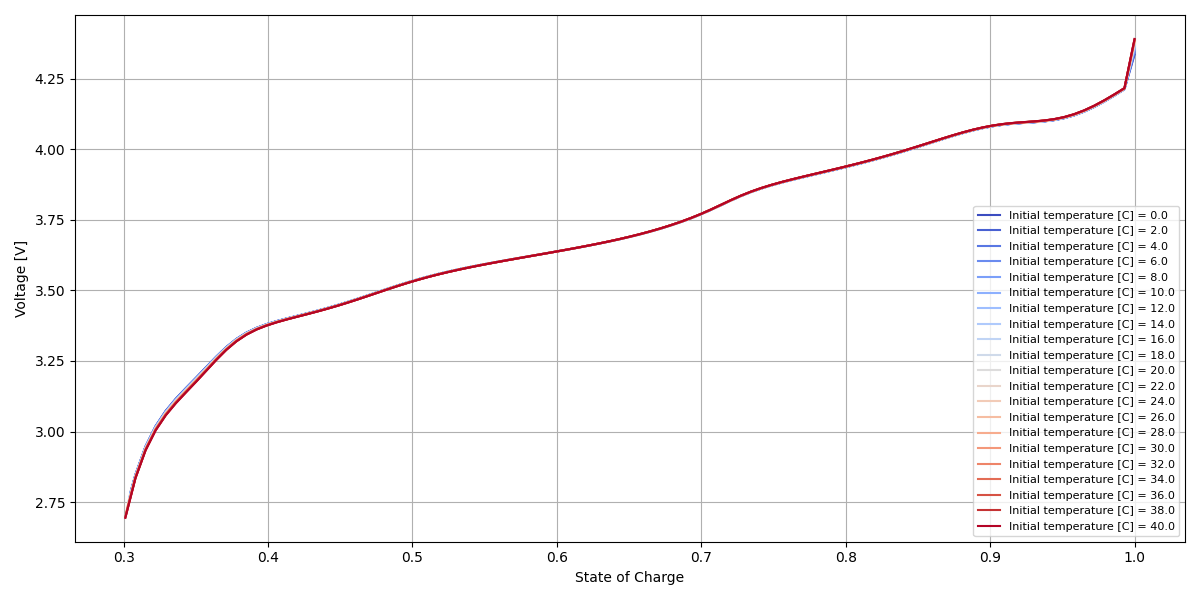

[1.0, 0.9930117156766671, 0.9860234313533343, 0.9790351470300016, 0.9720468627066687, 0.9650585783833361, 0.958070294060003, 0.9510820097366699, 0.944093725413338, 0.9371054410900057, 0.9301171567666733, 0.9231288724433412, 0.9161405881200084, 0.9091523037966754, 0.9021640194733432, 0.8951757351500084, 0.8881874508266774, 0.8811991665033487, 0.8742108821800132, 0.8672225978566811, 0.8602343135333476, 0.8532460292100149, 0.8462577448866834, 0.839269460563353, 0.8322811762400204, 0.8252928919166876, 0.8183046075933563, 0.8113163232700228, 0.8043280389466901, 0.7973397546233627, 0.7903514703000298, 0.7833631859766997, 0.776374901653366, 0.7693866173300347, 0.7623983330067039, 0.7554100486833757, 0.7484217643600413, 0.7414334800367091, 0.7344451957133797, 0.7274569113900529, 0.7204686270667195, 0.7134803427433798, 0.7064920584200507, 0.6995037740967167, 0.6925154897733865, 0.6855272054500547, 0.6785389211267272, 0.6715506368033987, 0.6645623524800697, 0.6575740681567354, 0.6505857838334044

In [7]:
#Extracting OCV curve from GITT test

OCV_V =[]
OCV_t = [] 
OCV_SOC = []

for sol in GITT_solsT:
    #repeat this entire process for every temperature that was simulated 
    IC_V = sol["Terminal voltage [V]"].entries[0]
    IC_Q = sol["Discharge capacity [A.h]"].entries[0]
    IC_C = sol["Total lithium capacity [A.h]"].entries[0]
    #locate initial conditions first for voltage, discharge capacity, and capacity 
    IC_SOC = 1 - (IC_Q / IC_C)
    #calculate initial condition for SOC
    OCV_V_temp = [IC_V]
    OCV_t_temp = [0]
    OCV_SOC_temp = [IC_SOC]


    for cycle in sol.cycles:
        #for every cycle (defined by the parenthesis in the experiment), take the last data point (when the cell has come to rest after 2.5 hours)



        OCV_V_temp.append(cycle["Terminal voltage [V]"].entries[-1])

        OCV_t_temp.append(cycle["Time [s]"].entries[-1])

        Q = cycle["Discharge capacity [A.h]"].entries[-1]
        C = cycle["Total lithium capacity [A.h]"].entries[0]  # assumed constant
    
        OCV_SOC_temp.append(1 - (Q / C))

    OCV_V.append(OCV_V_temp)
    OCV_t.append(OCV_t_temp)
    OCV_SOC.append(OCV_SOC_temp)


plt.figure(figsize=(12, 6))

for z, v, label, T in zip(OCV_SOC, OCV_V, labels, temps):
    color = cmap(norm(T))
    plt.plot(z, v, label=label, color = color)


plt.xlabel("State of Charge")
plt.ylabel("Voltage [V]")

plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

print(OCV_SOC[1])
print(OCV_V[1])

2025-06-05 11:19:21.519 - [WARNING] base_model.default_solver(417): The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.
2025-06-05 11:19:22.410 - [WARNING] simulation.solve(871): Step 'Discharge at C/100 until 2.5 V' is infeasible at initial conditions, but skip_ok is True. Skipping step.
2025-06-05 11:19:22.414 - [WARNING] simulation.solve(871): Step 'Discharge at C/100 until 2.5 V' is infeasible at initial conditions, but skip_ok is True. Skipping step.
2025-06-05 11:19:22.422 - [WARNING] simulation.solve(871): Step 'Discharge at C/100 until 2.5 V' is infeasible at initial conditions, but skip_ok is True. Skipping step.
2025-06-05 11:19:22.426 - [WARNING] simulation.solve(871): Step 'Discharge at C/100 until 2.5 V' is infeasible at initial conditions, but skip_ok is True. Skipping step.
2025-06-05 11:19:22.430 - [WARNING] simulation.solve(871): Step 'Discharge at C/100 until 2.5 V' 

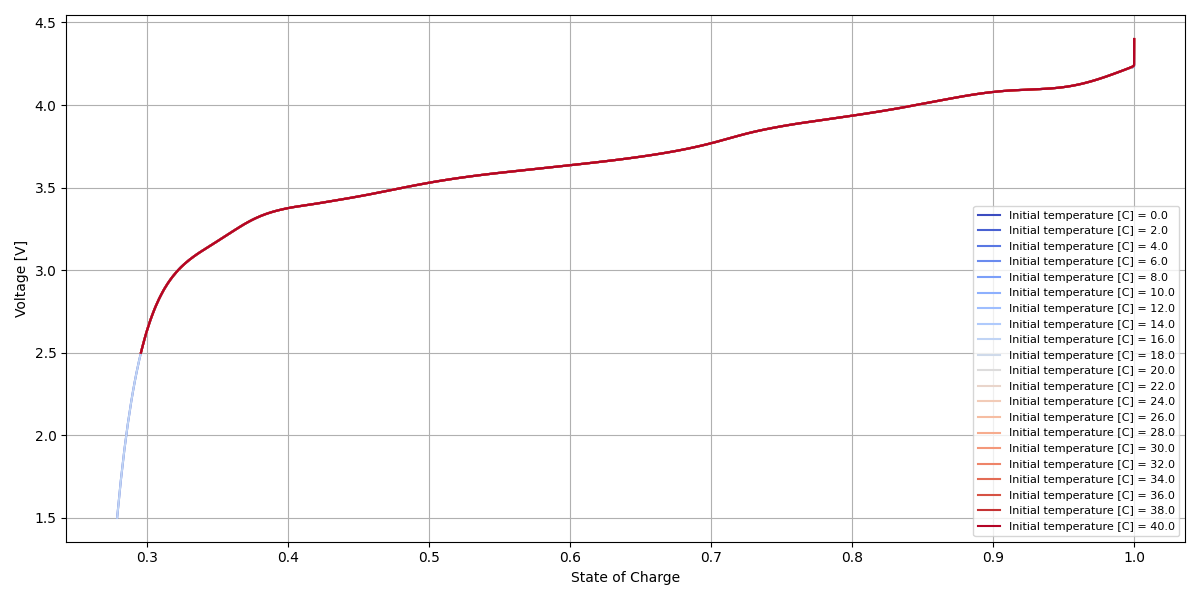

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 0.99999999 0.99999999 0.99999998 0.99999997 0.99999996 0.99999996
 0.99999995 0.99999994 0.99999993 0.99999991 0.9999999  0.99999988
 0.99999987 0.99999985 0.99999984 0.99999983 0.99999981 0.9999998
 0.99999977 0.99999974 0.99999971 0.99999968 0.99999965 0.9999996
 0.99999956 0.99999952 0.99999948 0.99999944 0.99999938 0.99999932
 0.99999926 0.9999992  0.99999914 0.99999908 0.99999896 0.99999885
 0.99999873 0.99999861 0.99999849 0.99999838 0.99999821 0.99999804
 0.99999786 0.99999769 0.99999752 0.99999718 0.99999684 0.99999654
 0.99999624 0.99999594 0.99999564 0.99999533 0.99999503 0.99999473
 0.99999413 0.99999352 0.99999298 0.99999244 0.99999189 0.99999135
 0.99999026 0.99998918 0.99998809 0.99998661 0.99998513 0.99998365
 0.99998218 0.9999807  0.99997922 0.99997626 0.9999733  0.99997035
 0.99996739 0.99996443 0.99996148 0.99995556 0.99994965 0.99994432
 0.99

In [8]:
exp_GITT = pybamm.Experiment([
(
    "Discharge at C/100 until 2.5 V",
)
]*100)

OCV_solsT = []
OCV_V = []
OCV_SOC = []

for t, tinC in zip(temps, tempsinC):
    param_temp = param.copy()
    param_temp.update({"Initial temperature [K]": t})

    sim = pybamm.Simulation(mdl_DFN_NMC, parameter_values = param_temp, experiment = exp_GITT)
    sol = sim.solve(initial_soc=1.0)

    OCV_V.append(sol["Terminal voltage [V]"].entries)

    Q = sol["Discharge capacity [A.h]"].entries
    C = sol["Total lithium capacity [A.h]"].entries[0]  # assumed constant
    OCV_SOC.append(1 - (Q / C))


plt.figure(figsize=(12, 6))

for z, v, label, T in zip(OCV_SOC, OCV_V, labels, temps):
    color = cmap(norm(T))
    plt.plot(z, v, label=label, color = color)


plt.xlabel("State of Charge")
plt.ylabel("Voltage [V]")

plt.legend(fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

print(OCV_SOC[1])
print(OCV_V[1])